In [53]:
%pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


# Motivation

Let's return to our well known classic - the _Iris_ dataset. Imagine you're tasked with writing a program for classifying the three species.
You'd probably perform some basic data exploration and visualization...

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#kind of important - we have to talk about this a bit later again ....
my_random_state = 10

In [55]:
iris_data = sns.load_dataset('iris')
iris_data.sample(n=5)

,sepal_length,sepal_width,petal_length,petal_width,species
12,4.8,3.0,1.4,0.1,setosa
146,6.3,2.5,5.0,1.9,virginica
133,6.3,2.8,5.1,1.5,virginica
140,6.7,3.1,5.6,2.4,virginica
24,4.8,3.4,1.9,0.2,setosa


In [56]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [57]:
iris_data.groupby('species').agg(['min', 'mean', 'max'])

sepal_length             sepal_width             petal_length  \
                    min   mean  max         min   mean  max          min   
species                                                                    
setosa              4.3  5.006  5.8         2.3  3.428  4.4          1.0   
versicolor          4.9  5.936  7.0         2.0  2.770  3.4          3.0   
virginica           4.9  6.588  7.9         2.2  2.974  3.8          4.5   

                       petal_width              
             mean  max         min   mean  max  
species                                         
setosa      1.462  1.9         0.1  0.246  0.6  
versicolor  4.260  5.1         1.0  1.326  1.8  
virginica   5.552  6.9         1.4  2.026  2.5

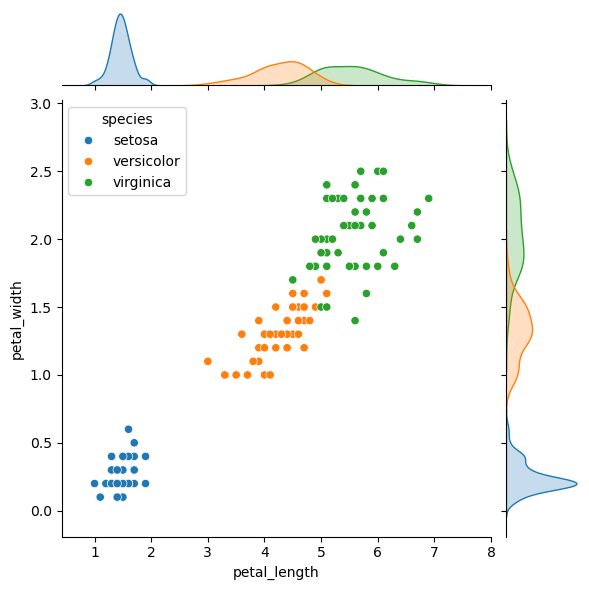

In [58]:
sns.jointplot(data=iris_data, x='petal_length', y='petal_width', hue='species')

...and then come up with a solution (probably) similar to the following _Java_ example:

```
if(petalLength <= 2) {
    return Species.SETOSA;
}
else {
    if(5 <= petalLength) {
        return Species.VERSICOLOR;
    }
    else {
        if(1.8 < petalWidth) {
            return Species.VIRGINICA;
        }
        else {
            return Species.VERSICOLOR;
        }
    }
}
```

The exemplary implementation above resembles a _binary tree_: at each node we ask a _yes/no_-question (e.g. _Is the petal length greater than or equal to 5?_) and either continue asking or ascertain the result.

This analogy - with the questions being the _decisions_ and the results the _leaves_ - is the base for **_Decision Trees_**, a widely used **_supervised_** _machine learning_ algorithm, popular for its simplicity and interpretability. Before we dive deeper into the technical details, let's try it out on the _Iris_ dataset:

1. We import the relevant classes/modules from _scikit_learn_.
    * We use the `Classifier` since we're dealing with a **_classification_** problem.
1. We segregate the **_features_** into variable `X` and the **_label_** into variable `y`.
1. We **_split_** the data into two parts, one for **_training_** and one for **_testing_**.
1. We **_train_** the _decision tree_ **_model_** using `fit`, supplying the training data as input.
1. We use the model to **_predict_** the labels using the features from the test data.
1. We calculate the **_accuracy_** (_number of correct predictions_ divided by the _total number of predictions_) to **_evaluate_** our model.

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [60]:
X = iris_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris_data['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

accuracy_score = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2%}'.format(accuracy_score))

Accuracy: 92.11%


Above 90% accuracy, without adjusting any **_hyperparameters_**!

We can take a look at the structure of the _decision tree_ as follows - demonstrating its _interpretability_:

In [61]:
from sklearn import tree

In [62]:
text_representation = tree.export_text(dt_model, feature_names=list(iris_data.columns[:-1]))
print(text_representation)

|--- petal_length <= 2.45
|   |--- class: setosa
|--- petal_length >  2.45
|   |--- petal_length <= 4.95
|   |   |--- petal_width <= 1.65
|   |   |   |--- class: versicolor
|   |   |--- petal_width >  1.65
|   |   |   |--- class: virginica
|   |--- petal_length >  4.95
|   |   |--- class: virginica



[Text(0.4, 0.875, 'petal_length <= 2.45\ngini = 0.666\nsamples = 112\nvalue = [37, 35, 40]\nclass = virginica'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]\nclass = setosa'),
 Text(0.30000000000000004, 0.75, 'True  '),
 Text(0.6, 0.625, 'petal_length <= 4.95\ngini = 0.498\nsamples = 75\nvalue = [0, 35, 40]\nclass = virginica'),
 Text(0.5, 0.75, '  False'),
 Text(0.4, 0.375, 'petal_width <= 1.65\ngini = 0.102\nsamples = 37\nvalue = [0, 35, 2]\nclass = versicolor'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]\nclass = versicolor'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = virginica'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 38\nvalue = [0, 0, 38]\nclass = virginica')]

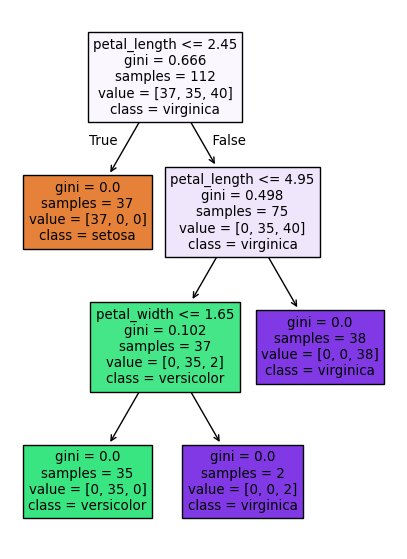

In [63]:
fig = plt.figure(figsize=(5,7))
tree.plot_tree(dt_model, feature_names=iris_data.columns[:-1], class_names=iris_data['species'].unique(), filled=True)

Or use some helper methods or libraries to plot the _decision regions_:

N.B.: The library we use in this demonstration only works with numerical values, hence the cumbersome transformations.

c:\Users\fabia\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

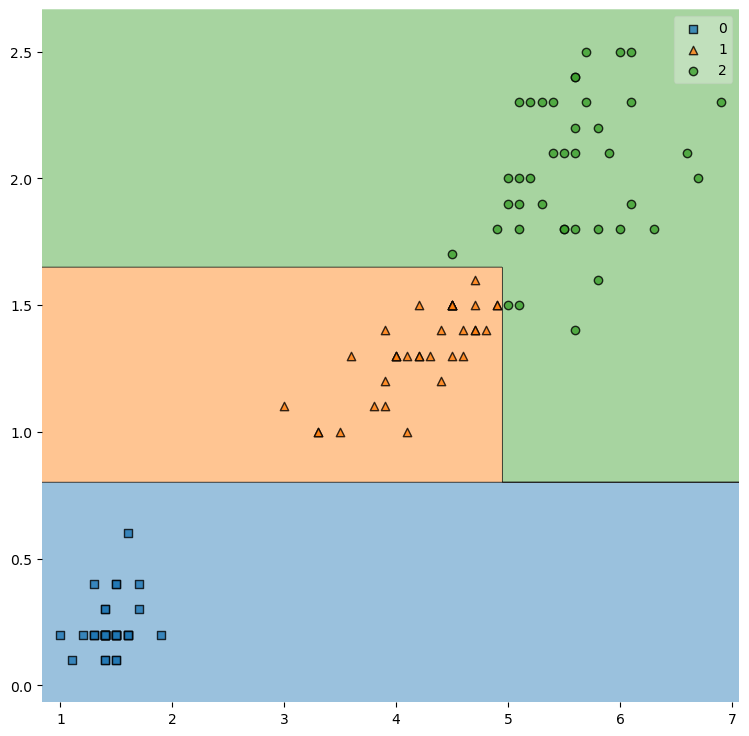

In [64]:
from mlxtend.plotting import plot_decision_regions

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train.iloc[:,2:], np.unique(y_train, return_inverse=True)[1])

plt.figure(figsize=(9,9))
plot_decision_regions(X=X_train.iloc[:,2:].to_numpy(dtype=float), y=np.unique(y_train, return_inverse=True)[1], clf=dt_model, zoom_factor=6)

# Decision _Th(r)eory_

Take a look at the provided article by Alan Jeffares!


# Real Life Example: _Breast Cancer_ Data Set

![](images/breast-cancer.png)

Time to apply our new knowledge to a real and meaningful example. According to the _Mayo Clinic_, breast cancer is the most common form of cancer diagnosed in women in the united states - but there's also some optimistic news:

> Substantial support for breast cancer awareness and research funding has helped created advances in the diagnosis and treatment of breast cancer. Breast cancer survival rates have increased, and the number of deaths associated with this disease is steadily declining, largely due to factors such as earlier detection, a new personalized approach to treatment and a better understanding of the disease.

Maybe the chances for early detection could be increased even further by _machine learning_?

For this demo we'll be working with the _Breast Cancer Wisconsin_ dataset, containing features computed from a digitized image of a _fine needle aspirate_ (_FNA_) of breast mass. They describe characteristics of the cell nuclei present in the image. Our _target_ is the prediction whether the tissue sample is _malignant_ or not.

To focus on the task at hand - the prediction itself - we'll limit ourselves to a quick peek at the data and skip the visualization for now:

In [65]:
bcw_data = pd.read_csv('./breast-cancer-prepared.csv')

In [66]:
bcw_data.sample(10, random_state=my_random_state)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,is_malignant
172,15.460,11.89,102.50,736.9,0.12570,0.15550,0.203200,0.10970,0.1966,0.07069,...,17.04,125.00,1102.0,0.1531,0.35830,0.58300,NaN,0.3216,0.10100,1
553,9.333,21.94,59.01,264.0,0.09240,0.05605,0.039960,0.01282,0.1692,0.06576,...,25.05,62.86,295.8,0.1103,0.08298,0.07993,0.02564,NaN,0.07393,0
374,13.690,16.07,87.84,579.1,0.08302,0.06374,0.025560,0.02031,0.1872,0.05669,...,20.21,99.16,670.6,0.1105,0.20960,0.13460,0.06987,0.3323,0.07701,0
370,16.350,23.29,109.00,840.4,0.09742,0.14970,0.181100,0.08773,0.2175,0.06218,...,NaN,129.30,1165.0,0.1415,0.46650,0.70870,0.22480,0.4824,0.09614,1
419,11.160,21.41,70.95,380.3,0.10180,0.05978,0.008955,0.01076,0.1615,0.06144,...,28.92,79.26,NaN,0.1282,0.11080,0.03582,0.04306,0.2976,0.07123,0
152,9.731,15.34,63.78,300.2,0.10720,0.15990,0.410800,0.07857,0.2548,0.09296,...,NaN,71.04,380.5,0.1292,0.27720,0.82160,0.15710,0.3108,0.12590,0
550,10.860,21.48,68.51,360.5,0.07431,0.04227,0.000000,0.00000,0.1661,0.05948,...,24.77,74.08,NaN,0.1001,0.07348,0.00000,0.00000,0.2458,0.06592,0
92,13.270,14.76,84.74,551.7,0.07355,0.05055,0.032610,0.02648,0.1386,0.05318,...,22.35,104.50,830.6,0.1006,0.12380,0.13500,0.10010,NaN,0.06206,0
264,NaN,22.07,111.60,928.3,0.09726,0.08995,0.090610,0.06527,0.1867,0.05580,...,29.33,140.50,1436.0,0.1558,0.25670,0.38890,0.19840,0.3216,0.07570,1
214,14.190,23.81,92.87,610.7,0.09463,0.13060,0.111500,0.06462,0.2235,0.06433,...,34.85,115.00,811.3,0.1559,0.40590,0.37440,0.17720,0.4724,0.10260,1


In [67]:
bcw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              567 non-null    float64
 1   mean texture             564 non-null    float64
 2   mean perimeter           566 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         560 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      558 non-null    float64
 8   mean symmetry            560 non-null    float64
 9   mean fractal dimension   562 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               544 non-null    float64
 14  smoothness error         5

In [68]:
bcw_data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,is_malignant
count,567.000000,564.000000,566.000000,569.000000,569.000000,560.000000,569.000000,558.000000,560.000000,562.000000,...,480.000000,569.000000,462.000000,569.000000,569.000000,569.000000,502.000000,467.000000,569.000000,569.000000
mean,14.122344,19.250656,91.905936,654.889104,0.096360,0.104689,0.088799,0.048947,0.181260,0.062770,...,25.538187,107.261213,878.514935,0.132369,0.254265,0.272188,0.113485,0.289594,0.083946,0.372583
std,3.527902,4.259503,24.345462,351.914129,0.014064,0.053012,0.079720,0.038802,0.027522,0.007040,...,6.029237,33.602542,553.542968,0.022832,0.157336,0.208624,0.066139,0.060857,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.695000,16.170000,75.065000,420.300000,0.086370,0.065403,0.029560,0.020413,0.162000,0.057693,...,21.160000,84.110000,516.825000,0.116600,0.147200,0.114500,0.062960,0.251150,0.071460,0.000000
50%,13.340000,18.835000,86.140000,551.100000,0.095870,0.094035,0.061540,0.033600,0.179200,0.061515,...,25.245000,97.660000,696.050000,0.131300,0.211900,0.226700,0.097660,0.282300,0.080040,0.000000
75%,15.780000,21.735000,104.025000,782.700000,0.105300,0.130500,0.130700,0.073910,0.195750,0.066120,...,29.170000,125.400000,1041.750000,0.146000,0.339100,0.382900,0.162225,0.318150,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,3432.000000,0.222600,1.058000,1.252000,0.290300,0.663800,0.207500,1.000000


## Splitting And _Stratification_

As you've already learned, we can adjust _hyperparameters_ to tune our model's performance. But how can we both tune and find out, which combination of hyperparameters (and preprocessing methods) performs best on unseen data?

* If we tweak and evaluate using the _training_ data we risk _overfitting_ - after all, we have no idea, if our model simply _memorizes the right answers_.
* If we tweak and evaluate using the _test_ data we risk adapting to data, that should have remained unseen - preventing an unbiased evaluation of how well our model performs on unseen data.

This is where the additional _validation_ set comes into play:

* We use the _training_ data to train our model.
* We play around with various hyperparameters (and preprocessing methods) and evaluate the performance using the _validation_ set.
* As soon as we have found the model that performs best on the validation set, we can use the unseen data in the _test_ set for the final evaluation.

The following image (from _V7 Labs_) illustrates the general process:

![](images/train_val_test_process.png)

As always, there is no _one size fits all_ split percentage we can use, since it's hugely depending on the data (and amount of it). The following typical split percentages are suggested by _V7 Labs_:

![](images/train_val_test_percentages.png)

We'll be using the 70%-15%-15%-split for this demo. For this we can reuse the `train_test_split` method by simply calling it two times:

In [69]:
my_test_and_val_ratio = 0.3

In [70]:
X = bcw_data[bcw_data.columns[:-1]]
y = bcw_data['is_malignant']
#0.3 => 70% training and 30% testing
X_train, X_test_full, y_train, y_test_full = train_test_split(X, y, random_state=my_random_state, test_size=my_test_and_val_ratio)
#0.5 on the testing => 15% testing and 15% validation
X_val, X_test, y_val, y_test = train_test_split(X_test_full, y_test_full, random_state=my_random_state, test_size=0.5)

array([<Axes: ylabel='0'>], dtype=object)

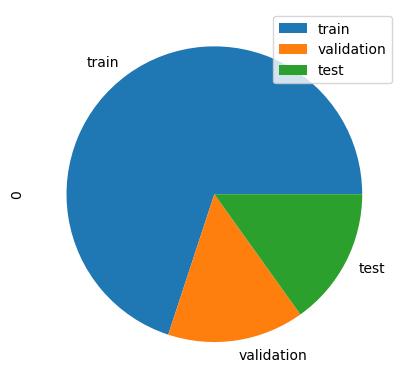

In [71]:
#just to be sure :) - let us check via the lenght of the datasets
pd.DataFrame([len(y_train), len(y_val), len(y_test)], index=['train', 'validation', 'test']).plot(kind='pie', subplots=True)

The above pie chart shows that we correctly split the data. Or did we? Is there anything else we need to look out for?

Let's take a look at the _class distributions_ across the three sets - i.e. how many of the recorded tissue samples are malignant per set:

<Axes: title={'center': 'test'}, ylabel='count'>

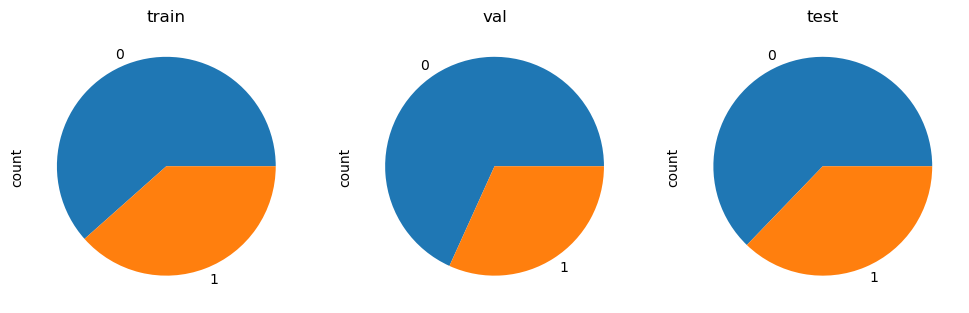

In [72]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,6))
y_train.value_counts().plot(kind='pie', ax=ax1, title='train')
y_val.value_counts().plot(kind='pie', ax=ax2, title='val')
y_test.value_counts().plot(kind='pie', ax=ax3, title='test')

As we can see, the classes are not distributed equally - in our case the validation set contains less malignant samples than the others. Depending on the random seed we use, this can drastically change - and drastically influence our machine learning model and its evaluation. E.g. imagine an extreme case, where the malignant samples are severly underrepresented in the training set: How should our model learn, how to detect cancerous cells?

Let's take a look at the overall class distribution across all data:

In [73]:
bcw_data['is_malignant'].value_counts()

is_malignant
0    357
1    212
Name: count, dtype: int64

<Axes: ylabel='count'>

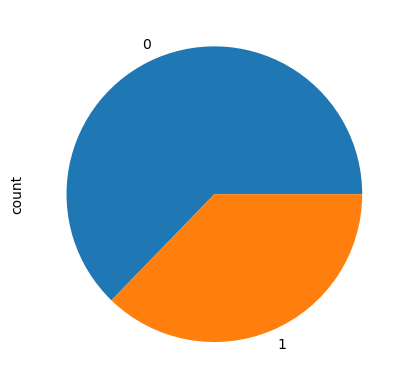

In [74]:
bcw_data['is_malignant'].value_counts().plot(kind='pie')

As you see we're dealing with a slightly _imbalanced_ distribution of target classes. It makes sense to ensure the same proportions when splitting into _training_ and _testing_ data. This is called **_stratification_** (or _stratified sampling_) and can be easily achieved using the `stratify` parameter:

In [75]:
X = bcw_data[bcw_data.columns[:-1]]
y = bcw_data['is_malignant']

#same as before - this time with stratify!
X_train, X_test_full, y_train, y_test_full = train_test_split(X, y, random_state=my_random_state, test_size=my_test_and_val_ratio, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_test_full, y_test_full, random_state=my_random_state, test_size=0.5, stratify=y_test_full)

<Axes: title={'center': 'test'}, ylabel='count'>

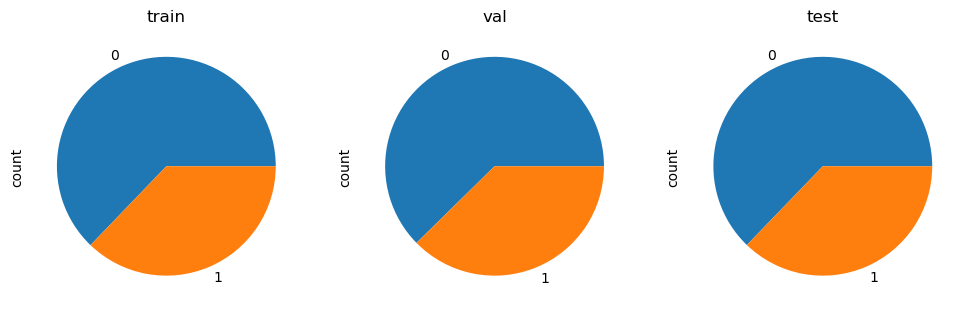

In [76]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,6))
y_train.value_counts().plot(kind='pie', ax=ax1, title='train')
y_val.value_counts().plot(kind='pie', ax=ax2, title='val')
y_test.value_counts().plot(kind='pie', ax=ax3, title='test')

Et voilà - the proportion of malignant samples is now the same across all sets. We can continue with the training.

## Baseline

When starting a machine learning project, it's a good idea to define a _baseline_ to compare against. We can easily achieve this using a `DummyClassifier`: In combination with the `most_frequent` parameter, it ignores all the features and simply returns the most often observed label. Since approximately two out of three tissue samples are benign, this is analogous to saying _every sample is benign_ - resulting in an accuracy slightly above 60%:

In [77]:
from sklearn.dummy import DummyClassifier

In [78]:
dummy_model = DummyClassifier(strategy='most_frequent')
dummy_model.fit(X_train, y_train)

y_pred = dummy_model.predict(X_test)

accuracy_score = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2%}'.format(accuracy_score))

Accuracy: 62.79%


## First Try With A Decision Tree

Let's see if we can beat the baseline using a decision tree and all columns (but the label obviously) as features:

In [79]:
try:
    dt_model = DecisionTreeClassifier(random_state=my_random_state)
    dt_model.fit(X_train, y_train)
    
    y_pred = dt_model.predict(X_val)
    
    accuracy_score = metrics.accuracy_score(y_val, y_pred)
    print('Accuracy: {:.2%}'.format(accuracy_score))
except Exception as e:
    print(e)

Accuracy: 88.24%


Apparently the decision tree can't work with _null_ values... let's see if and how we can fix that.

# Dealing With Missing Values

In real-world data you'll often encounter missing values - be it due to problems when recording observations or data corruption. You need to learn how to handle these cases, since many machine learning algorithms can't work with missing data.

## Dropping

An obvious possible solution is simply removing missing values. Depending on the amount, you can either drop the erroneous rows or even the whole columns. There's no exact ratio of missing values, when you should start considering dropping a whole column - literature suggests about 50%, but it highly depends on the dataset.

Let's take another look at the missing value count:

In [80]:
bcw_data.isnull().sum()

mean radius                  2
mean texture                 5
mean perimeter               3
mean area                    0
mean smoothness              0
mean compactness             9
mean concavity               0
mean concave points         11
mean symmetry                9
mean fractal dimension       7
radius error                 0
texture error                0
perimeter error              0
area error                  25
smoothness error             0
compactness error           22
concavity error              0
concave points error         0
symmetry error               5
fractal dimension error     44
worst radius                53
worst texture               89
worst perimeter              0
worst area                 107
worst smoothness             0
worst compactness            0
worst concavity              0
worst concave points        67
worst symmetry             102
worst fractal dimension      0
is_malignant                 0
dtype: int64

Let's see how many rows are affected, when we simply drop them using the built-in `dropna`-method:

In [81]:
bcw_data_dropped_rows = bcw_data.dropna()
bcw_data_dropped_rows.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 27 to 545
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              9 non-null      float64
 1   mean texture             9 non-null      float64
 2   mean perimeter           9 non-null      float64
 3   mean area                9 non-null      float64
 4   mean smoothness          9 non-null      float64
 5   mean compactness         9 non-null      float64
 6   mean concavity           9 non-null      float64
 7   mean concave points      9 non-null      float64
 8   mean symmetry            9 non-null      float64
 9   mean fractal dimension   9 non-null      float64
 10  radius error             9 non-null      float64
 11  texture error            9 non-null      float64
 12  perimeter error          9 non-null      float64
 13  area error               9 non-null      float64
 14  smoothness error         9 non-n

Unfortunately this removed everything but 9 rows, rendering the dataset useless.

To recap: In a situation like the following example...

In [82]:
example_data = pd.DataFrame({'my_value': [1, 2, np.nan, 4], 'my_other_value': [5, 6, 13, 8], 'yet_another_value': [9, 10, np.nan, 12]})
example_data

,my_value,my_other_value,yet_another_value
0,1.0,5,9.0
1,2.0,6,10.0
2,NaN,13,NaN
3,4.0,8,12.0


...deleting the row(s) containing missing values would definitely make sense.

Our situation is closer to the next example...

In [83]:
example_data = pd.DataFrame({'my_value': [1, 2, 3, 4], 'my_other_value': [5, 6, np.nan, 8], 'yet_another_value': [9, np.nan, 11, np.nan]})
example_data

,my_value,my_other_value,yet_another_value
0,1,5.0,9.0
1,2,6.0,NaN
2,3,NaN,11.0
3,4,8.0,NaN


...where we would lose almost all rows.

Let's try dropping the columns instead. We start by gathering the problematic columns:

In [84]:
cols_with_missing_vals = [c for c in X.columns if X[c].isnull().any()]
cols_with_missing_vals

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean compactness',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'area error',
 'compactness error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst area',
 'worst concave points',
 'worst symmetry']

We can now use the `drop`-method in combination with the `axis` parameter set to $1$ (since we want to delete _columns_). We obviously need to do this on training, validation and testing data:

In [85]:
X_train_dropped_cols = X_train.drop(cols_with_missing_vals, axis=1)
X_val_dropped_cols = X_val.drop(cols_with_missing_vals, axis=1)
X_test_dropped_cols = X_test.drop(cols_with_missing_vals, axis=1)

We can finally train our tree:

In [86]:
dt_model = DecisionTreeClassifier(random_state=my_random_state)
dt_model.fit(X_train_dropped_cols, y_train)

y_pred = dt_model.predict(X_val_dropped_cols)

accuracy_score = metrics.accuracy_score(y_val, y_pred)
print('Accuracy: {:.2%}'.format(accuracy_score))

Accuracy: 83.53%


### _Hyperparameter Optimization_

Not bad, we're far above the baseline! Let's see if we can tune the _hyperparameters_ to achieve an even better result. We're gonna focus on the _tree depth_ in the following _helper method_:

In [87]:
def train_and_find_best_depth(X_train, X_val, y_train, y_val, do_print):
    result = None
    accuracy_max = -1
    
    for curr_max_depth in range(1, 20):
        dt_model = DecisionTreeClassifier(max_depth=curr_max_depth, random_state=my_random_state)
        dt_model.fit(X_train, y_train)
    
        y_pred = dt_model.predict(X_val)
    
        accuracy_score = metrics.accuracy_score(y_val, y_pred)
        
        if accuracy_score >= accuracy_max:
            accuracy_max = accuracy_score
            result = curr_max_depth
        
        if do_print:
            print('max depth {}: {:.2%} accuracy on validation set.'.format(curr_max_depth, accuracy_score))
    
    if do_print:
        print('-' * 20)
        print('best max depth {} has {:.2%} accuracy.'.format(result, accuracy_max))
    
    return result

And this is the moment, where the _validation_ set comes into play. We can now use it to find the best tree depth:

In [88]:
best_max_depth = train_and_find_best_depth(X_train_dropped_cols, X_val_dropped_cols, y_train, y_val, True)

max depth 1: 89.41% accuracy on validation set.
max depth 2: 92.94% accuracy on validation set.
max depth 3: 88.24% accuracy on validation set.
max depth 4: 89.41% accuracy on validation set.
max depth 5: 89.41% accuracy on validation set.
max depth 6: 89.41% accuracy on validation set.
max depth 7: 85.88% accuracy on validation set.
max depth 8: 88.24% accuracy on validation set.
max depth 9: 83.53% accuracy on validation set.
max depth 10: 83.53% accuracy on validation set.
max depth 11: 83.53% accuracy on validation set.
max depth 12: 83.53% accuracy on validation set.
max depth 13: 83.53% accuracy on validation set.
max depth 14: 83.53% accuracy on validation set.
max depth 15: 83.53% accuracy on validation set.
max depth 16: 83.53% accuracy on validation set.
max depth 17: 83.53% accuracy on validation set.
max depth 18: 83.53% accuracy on validation set.
max depth 19: 83.53% accuracy on validation set.
--------------------
best max depth 2 has 92.94% accuracy.


Apparently the _max depth_ of $2$ performs best on the validation set. Let's see, how well it performs on the unseen data in the _test_ set:

In [89]:
dt_model = DecisionTreeClassifier(max_depth=best_max_depth, random_state=my_random_state)
dt_model.fit(X_train_dropped_cols, y_train)

y_pred = dt_model.predict(X_test_dropped_cols)

accuracy_score_dropped_cols = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2%}'.format(accuracy_score_dropped_cols))

Accuracy: 89.53%


## Imputing Numerical Data

A downside of above approach is the loss of potentially important data, especially in columns where only few values were missing. A simple and popular alternative is **_imputation_** - the process of replacing missing data with substituted values.

Using statistical methods - e.g. the _mean_, _median_, _minimum_, _maximum_ or _most frequent_ value of a column - for estimating a suitable replacement and replacing all missing values with it is fast to calculate and often proves (very) effective.

Let's take a look at an example using a small dataframe with some missing values:

In [90]:
example_data = pd.DataFrame({'my_value': [1, 2, np.nan, 6], 'my_other_value': [np.nan, 4, np.nan, 10]})
example_data

,my_value,my_other_value
0,1.0,NaN
1,2.0,4.0
2,NaN,NaN
3,6.0,10.0


We now use _scikit-learn_'s `SimpleImputer` for imputing the missing values: After importing the class and setting the _strategy_ (i.e. the (statistical) method), we **_fit_** the _imputer_ to our data so it can find suitable replacement values for each column. Afterwards we use it to **_transform_** the columns, i.e. replace all missing values.

In [91]:
from sklearn.impute import SimpleImputer

In [92]:
simple_imputer = SimpleImputer(strategy='mean')

simple_imputer.fit(example_data[['my_value', 'my_other_value']])
example_data[['my_value', 'my_other_value']] = simple_imputer.transform(example_data[['my_value', 'my_other_value']])

example_data

,my_value,my_other_value
0,1.0,7.0
1,2.0,4.0
2,3.0,7.0
3,6.0,10.0


Let's try it out on our dataset. We already identified problematic columns above:

In [93]:
cols_with_missing_vals

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean compactness',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'area error',
 'compactness error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst area',
 'worst concave points',
 'worst symmetry']

We now use the `SimpleImputer` for dealing with all those columns:

In [94]:
simple_imputer = SimpleImputer(strategy='mean')

#deep copy - remember why?
X_train_imputed = X_train.copy()
X_val_imputed = X_val.copy()
X_test_imputed = X_test.copy()

X_train_imputed[cols_with_missing_vals] = simple_imputer.fit_transform(X_train[cols_with_missing_vals])
X_val_imputed[cols_with_missing_vals] = simple_imputer.transform(X_val[cols_with_missing_vals])
X_test_imputed[cols_with_missing_vals] = simple_imputer.transform(X_test[cols_with_missing_vals])

As you saw, we combined the _two-step-approach_ from above to perform both _fitting_ and _transforming_ on the training data using `fit_transform`. Why don't we use the same method on the test data? In order to simulate real world scenarios, we want the test data to be a completely new surprise set for our model! This is why we only use the imputation parameters learned from (or _fitted to_) the training data.

For this reason the standard approach is:

1. `fit_transform` on **training** data.
1. `transform` on **test/validation** data.

Let's see if the imputation improved our accuracy:

In [95]:
best_max_depth = train_and_find_best_depth(X_train_imputed, X_val_imputed, y_train, y_val, True)

max depth 1: 89.41% accuracy on validation set.
max depth 2: 91.76% accuracy on validation set.
max depth 3: 89.41% accuracy on validation set.
max depth 4: 89.41% accuracy on validation set.
max depth 5: 91.76% accuracy on validation set.
max depth 6: 90.59% accuracy on validation set.
max depth 7: 83.53% accuracy on validation set.
max depth 8: 84.71% accuracy on validation set.
max depth 9: 84.71% accuracy on validation set.
max depth 10: 84.71% accuracy on validation set.
max depth 11: 84.71% accuracy on validation set.
max depth 12: 84.71% accuracy on validation set.
max depth 13: 84.71% accuracy on validation set.
max depth 14: 84.71% accuracy on validation set.
max depth 15: 84.71% accuracy on validation set.
max depth 16: 84.71% accuracy on validation set.
max depth 17: 84.71% accuracy on validation set.
max depth 18: 84.71% accuracy on validation set.
max depth 19: 84.71% accuracy on validation set.
--------------------
best max depth 5 has 91.76% accuracy.


In [96]:
dt_model = DecisionTreeClassifier(max_depth=best_max_depth, random_state=my_random_state)
dt_model.fit(X_train_imputed, y_train)

y_pred = dt_model.predict(X_test_imputed)

accuracy_score_imputed = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2%}'.format(accuracy_score_imputed))

Accuracy: 91.86%


Albeit small, we still see a slight improvement. Depending on the dataset, _imputation_ will drastically boost the results in some cases, while in others it doesn't help that much.

## Imputing With A Flag

Imputed values may be systematically above or below their actual values (which weren't collected in the dataset). Or rows with missing values may be unique in some other way. In that case, your model would make better predictions by considering which values were originally missing.

An _extension_ to simple imputation would be adding a _flag_ column, indicating where values were missing.

Let's try this approach:

In [97]:
simple_imputer = SimpleImputer(strategy='mean')

X_train_imputed_plus = X_train.copy()
X_val_imputed_plus = X_val.copy()
X_test_imputed_plus = X_test.copy()

for curr_col in cols_with_missing_vals:
    X_train_imputed_plus[curr_col + '_was_missing'] = X_train_imputed_plus[curr_col].isnull()
    X_val_imputed_plus[curr_col + '_was_missing'] = X_val_imputed_plus[curr_col].isnull()
    X_test_imputed_plus[curr_col + '_was_missing'] = X_test_imputed_plus[curr_col].isnull()

X_train_imputed_plus[cols_with_missing_vals] = simple_imputer.fit_transform(X_train_imputed_plus[cols_with_missing_vals])
X_val_imputed_plus[cols_with_missing_vals] = simple_imputer.transform(X_val_imputed_plus[cols_with_missing_vals])
X_test_imputed_plus[cols_with_missing_vals] = simple_imputer.transform(X_test_imputed_plus[cols_with_missing_vals])

In [98]:
X_train_imputed_plus

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,mean fractal dimension_was_missing,area error_was_missing,compactness error_was_missing,symmetry error_was_missing,fractal dimension error_was_missing,worst radius_was_missing,worst texture_was_missing,worst area_was_missing,worst concave points_was_missing,worst symmetry_was_missing
515,11.34,18.61,72.76,391.2,0.10490,0.08499,0.04302,0.02594,0.1927,0.06211,...,False,True,False,False,False,False,False,False,False,False
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,False,False,False,False,False,True,False,False,False,False
47,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,False,False,False,False,False,False,False,False,False,True
485,12.45,16.41,82.85,476.7,0.09514,0.15110,0.15440,0.04846,0.2082,0.07325,...,False,False,False,False,False,False,False,True,False,False
211,11.84,18.94,75.51,428.0,0.08871,0.06900,0.02669,0.01393,0.1533,0.06057,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,18.61,20.25,122.10,1094.0,0.09440,0.10660,0.14900,0.07731,0.1697,0.05699,...,False,False,False,False,False,False,False,False,False,False
214,14.19,23.81,92.87,610.7,0.09463,0.13060,0.11150,0.06462,0.2235,0.06433,...,False,False,False,False,False,True,False,False,False,False
506,12.22,20.04,79.47,453.1,0.10960,0.11520,0.08175,0.02166,0.2124,0.06894,...,False,False,False,False,False,False,False,False,False,True
155,12.25,17.94,78.27,460.3,0.08654,0.06679,0.03885,0.02331,0.1970,0.06228,...,False,False,False,False,False,False,False,False,False,True


In [99]:
best_max_depth = train_and_find_best_depth(X_train_imputed_plus, X_val_imputed_plus, y_train, y_val, True)

max depth 1: 89.41% accuracy on validation set.
max depth 2: 91.76% accuracy on validation set.
max depth 3: 88.24% accuracy on validation set.
max depth 4: 90.59% accuracy on validation set.
max depth 5: 91.76% accuracy on validation set.
max depth 6: 89.41% accuracy on validation set.
max depth 7: 89.41% accuracy on validation set.
max depth 8: 89.41% accuracy on validation set.
max depth 9: 89.41% accuracy on validation set.
max depth 10: 89.41% accuracy on validation set.
max depth 11: 89.41% accuracy on validation set.
max depth 12: 89.41% accuracy on validation set.
max depth 13: 89.41% accuracy on validation set.
max depth 14: 89.41% accuracy on validation set.
max depth 15: 89.41% accuracy on validation set.
max depth 16: 89.41% accuracy on validation set.
max depth 17: 89.41% accuracy on validation set.
max depth 18: 89.41% accuracy on validation set.
max depth 19: 89.41% accuracy on validation set.
--------------------
best max depth 5 has 91.76% accuracy.


In [100]:
dt_model = DecisionTreeClassifier(max_depth=best_max_depth, random_state=my_random_state)
dt_model.fit(X_train_imputed_plus, y_train)

y_pred = dt_model.predict(X_test_imputed_plus)

accuracy_score_imputed_plus = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2%}'.format(accuracy_score_imputed_plus))

Accuracy: 94.19%


That boosted the accuracy on our data even further!

# Conclusion

In this demonstration you not only got to know the decision tree algorithm, you should be also starting to recognize the importance of data cleaning and preprocessing - which can take up to 80% of the overall effort of a data science project.

||Accuracy with best _max depth_|
|-|-|
|Baseline.|62.79%|
|Columns with missing values dropped.|89.53%|
|Imputation of missing values.|91.86%|
|Imputation of missing values with a flag.|94.19%|

In our example we were able to increase the models performance with imputation, as you can see in the table above. Note that the methods you need to use and the results will greatly vary depending on your data!

Obviously, the `random_state` also plays a major role (try it out!). We'll see how to tackle this problem in one of the next lessons.